# Make phase and power maps / movies


In [48]:
from scipy.io import loadmat
data = loadmat('DfMovies.mat') 
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'bottomUp', 'leftRight', 'rightLeft', 'topDown'])

In [28]:
# define variables from data
bottomUp = data['bottomUp'];
topDown = data['topDown'];
leftRight = data['leftRight'];
rightLeft = data['rightLeft'];
bottomUp.shape

(55, 360, 352)

In [226]:
#fourier transform 
import numpy as np
from scipy import fftpack

spectrumMovie = np.fft.fft(leftRight, axis=0)

#generate power movie
powerMovie = (np.abs(spectrumMovie) *2.) / np.size(spectrumMovie,0)
powerMap = np.abs(powerMovie[1,:,:])

#generate phase movie
phaseMovie = np.angle(spectrumMovie)
phaseMap = -1*phaseMovie[1,:,:]
phaseMap = phaseMap % (2 * np.pi)

#frequency
freqArray = fftpack.fftfreq(np.size(spectrumMovie,0),d = .1)
freq = freqArray[1]
freq

#calculate time delay
timeShiftMap = phaseMap / (2*np.pi) / freq

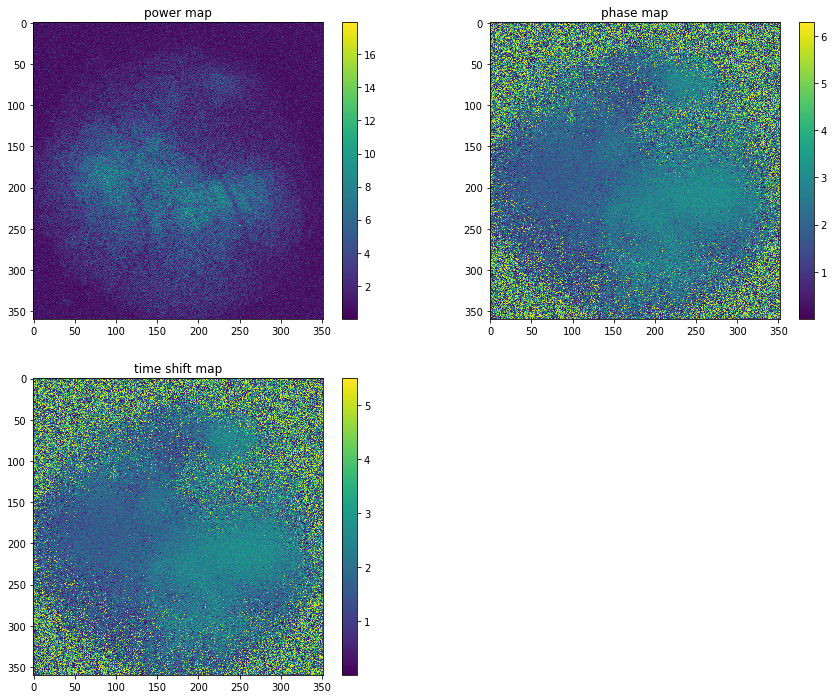

In [227]:
# plot maps 
import matplotlib.pyplot as plt

f = plt.figure(figsize=(15, 12))

ax1 = f.add_subplot(221)
fig1 = plt.imshow(powerMap)
ax1.set_title('power map')
_ = f.colorbar(fig1)

ax2 = f.add_subplot(222)
fig2 = plt.imshow(phaseMap)
ax2.set_title('phase map')
_ = f.colorbar(fig2)

ax3 = f.add_subplot(223)
fig3 = plt.imshow(timeShiftMap)
ax3.set_title('time shift map')
_ = f.colorbar(fig3)

In [242]:
phaseMap

array([[4.0597913 , 2.26864429, 1.04977206, ..., 3.4798497 , 0.93173405,
        3.73743096],
       [3.72604148, 3.92078998, 1.02149108, ..., 2.89650338, 1.57606746,
        1.31243458],
       [1.29870932, 6.14908255, 0.94466338, ..., 4.79383322, 0.36125821,
        0.2432756 ],
       ...,
       [4.3914149 , 0.81383366, 5.47678244, ..., 0.24628213, 2.18329553,
        1.9651431 ],
       [6.12829925, 0.28553307, 1.95242022, ..., 3.22358278, 4.69586745,
        4.27910288],
       [1.35705408, 0.5034535 , 4.80889561, ..., 5.5312963 , 0.13327702,
        2.91036858]])

In [250]:
vector = spectrumMovie[:,1,1]
np.abs(spectrumMovie[:,229,225])

array([390.95238095, 102.88578694,  41.18891929,  85.21102553,
        61.97723814,  67.18585174,  61.5966764 ,  64.7582116 ,
        94.94807314,  77.25583773,  76.72169572,  51.25220016,
        17.11835275,  19.86856707,  69.97893765,  33.66402603,
        54.89683753,  48.2166352 ,  26.51629662,  73.37095073,
        52.74145001,  87.3866765 ,  78.66960291,  45.39815106,
        88.32605655,  61.43830673,  64.44884176,  50.18504578,
        50.18504578,  64.44884176,  61.43830673,  88.32605655,
        45.39815106,  78.66960291,  87.3866765 ,  52.74145001,
        73.37095073,  26.51629662,  48.2166352 ,  54.89683753,
        33.66402603,  69.97893765,  19.86856707,  17.11835275,
        51.25220016,  76.72169572,  77.25583773,  94.94807314,
        64.7582116 ,  61.5966764 ,  67.18585174,  61.97723814,
        85.21102553,  41.18891929, 102.88578694])